# Project Title: CNN Implementation for MNIST Digit Recognition

# Importing Libraries

In [1]:
#Importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


NumPy or Numerical Python is the main library for performing calculations in Python. It provides support for multidimensional arrays and a wide range of arithmetic operations to improve performance on these arrays. The NumPy ndarray object simplifies high-performance calculations and allows easy integration with other scientific libraries. Lots of calculations for linear results, numpy procedures, statistical analysis, etc. are needed, as well as moving, scientifically sound calculations. They can be easily prevented

TensorFlow is an open source machine learning framework developed by Google. It provides a comprehensive ecosystem for building, training, and efficiently deploying machine learning models. A key feature of TensorFlow is its computational graph abstraction, which allows users to define complex mathematical functions as a graph of nodes. It supports traditional machine learning algorithms and deep learning models, with built-in support for neural networks and distributed computing tools TensorFlow High-level like Keras for building and training simple models with low-level APIs for more fine-grained handling It provides APIs. Due to its scalability, flexibility and extensive community support, TensorFlow is widely used in research and development for various machine learning projects.

Scikit-learn, commonly abbreviated as sklearn, is a versatile machine learning library in Python. It offers a wide array of tools for data preprocessing, model selection, training, evaluation, and deployment. Sklearn provides implementations of various machine learning algorithms, including classification, regression, clustering, dimensionality reduction, and more. It emphasizes simplicity and ease of use, making it suitable for both beginners and experts in the field. Sklearn also supports integration with other Python libraries, such as NumPy and Pandas, and follows a consistent API design, facilitating rapid prototyping and experimentation. Its extensive documentation and active community make sklearn a go-to choice for machine learning tasks across industries.

Matplotlib is a powerful plotting library for Python that enables the creation of a wide range of high-quality visualizations. It provides a MATLAB-like interface for generating plots, allowing users to create line plots, scatter plots, histograms, bar charts, and more with ease. Matplotlib offers fine-grained control over every aspect of the plot, including axes, labels, colors, and styles. It supports both interactive and non-interactive plotting environments and can be seamlessly integrated with other Python libraries like NumPy and Pandas. With its versatility and flexibility, Matplotlib is widely used for data exploration, analysis, and presentation across various scientific and engineering disciplines.

# About the Dataset:

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

The MNIST dataset is a classic benchmark dataset in machine learning and computer vision. It contains a large collection of gray images, each representing a handwritten number (from 0 to 9). These images are 28x28 pixels, resulting in 784 elements when flattened into a one-dimensional layout.
MNIST is a standard dataset used to train and test machine learning models, especially for tasks such as image classification and digit recognition. It is widely used because of its simplicity, flexibility and relevance to real-world applications.
The data set is basically divided into two subsets: training set and test set. Typically, the training set consists of 60,000 images, while the testing set consists of 10,000 images. This division ensures that models can be trained on large enough data sets to identify meaningful patterns and tested on unobserved data to assess their generalizability
The corresponding representative digit is assigned to each image in the MNIST dataset. This labeling can learn from input-output pairs of machine learning models during training. For example, a model may learn to associate certain sets of pixel intensities with a particular digit using techniques such as convolutional neural networks (CNNs) or other classification algorithms
Researchers and practitioners use the MNIST dataset to compare and contrast different machine learning models, analyze their performance, and demonstrate how different algorithms and methods -10, Fashion-MNIST, and SVHN, reflect real-world image a they find it very difficult tasks.
In summary, the MNIST dataset provides the tools to identify and develop machine learning algorithms, especially in image classification and digital recognition and its broad applications have contributed to progress in the field and are a valuable tool researchers and practitioners.

Loading the Dataset:
The code loads the dataset and it is divided into two main parts: training data and testing data.(x_train, y_train): This tuple contains the training images (x_train) and their corresponding labels (y_train). Each image in x_train is a 28x28 grayscale image of a handwritten digit (from 0 to 9), while each label in y_train represents the actual value of the digit.

# Preprocessing:

In [3]:
# Preprocess the data
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

This code prepares the MNIST data set for machine learning training. It resizes the images to a 4D array format, ensuring that each is 28x28 pixels with a single grayscale channel. Pixel values ​​are converted to 32-bit floating-point numbers for computation consistency. Normalization scale values ​​from 0 to 1, helping convergence. Labels are single-hot encoded, representing each digit label (0 to 9) as a binary vector with one '1' and the rest '0'. This step standardizes the input data, preparing it specifically for neural networks for training on the MNIST dataset.


# CNN Architecture:

In [4]:
# Define the CNN architecture
model = tf.keras.Sequential([
    # Convolutional layer with 32 filters, each 3x3, using ReLU activation
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max pooling layer with 2x2 window size
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Convolutional layer with 64 filters, each 3x3, using ReLU activation
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer with 2x2 window size
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Convolutional layer with 64 filters, each 3x3, using ReLU activation
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Flatten layer to convert 2D feature maps to 1D array
    tf.keras.layers.Flatten(),
    # Dense (fully connected) layer with 64 neurons, using ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),
    # Output layer with 10 neurons (number of classes), using softmax activation
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

The above code describes a CNN using the TensorFlow Keras API for MNIST score classification. It adds layers sequentially: three convolutional layers (32, 64, 64 filters, 3x3 kernel, ReLU activation), two max-pooling layers (2x2), a smoothing layer, and two dense layers (64 neurons, ReLU activation; 10 neurons). , softmax). Convolutional layers extract objects, max-pooling layers down sample, and dense layers distribute. The model summary shows the layer parameters. This configuration works well for 28x28 pixel MNIST images that are commonly used for handwriting digit recognition tasks.

The CNN algorithm consists of convolutional layers that extract features from the input image, followed by a max-pooling layer that reduces spatial dimensions and transforms the feature maps into 1D arrays by smoothing. Condensed layers divide features, and the last layer generates class possibilities. This model contains 93,322 trainable parameters.

# Model Compilation:

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define a function to train and evaluate the model
def train_and_evaluate_model(model, x_train, y_train, x_test, y_test):
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)
    
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print("Test accuracy:", test_acc)
    
    return history

# Train and evaluate the model
history = train_and_evaluate_model(model, x_train, y_train, x_test, y_test)

Epoch 1/10
844/844 [==============================] - 16s 18ms/step - loss: 0.1919 - accuracy: 0.9419 - val_loss: 0.0512 - val_accuracy: 0.9863
Epoch 2/10
844/844 [==============================] - 15s 18ms/step - loss: 0.0522 - accuracy: 0.9838 - val_loss: 0.0483 - val_accuracy: 0.9847
Epoch 3/10
844/844 [==============================] - 15s 18ms/step - loss: 0.0373 - accuracy: 0.9886 - val_loss: 0.0350 - val_accuracy: 0.9897
Epoch 4/10
844/844 [==============================] - 15s 18ms/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0393 - val_accuracy: 0.9893
Epoch 5/10
844/844 [==============================] - 15s 18ms/step - loss: 0.0223 - accuracy: 0.9931 - val_loss: 0.0505 - val_accuracy: 0.9878
Epoch 6/10
844/844 [==============================] - 15s 18ms/step - loss: 0.0183 - accuracy: 0.9938 - val_loss: 0.0365 - val_accuracy: 0.9917
Epoch 7/10
844/844 [==============================] - 16s 18ms/step - loss: 0.0153 - accuracy: 0.9948 - val_loss: 0.0481 - val_accuracy:

About the Compilation parameters: 
Optimizer (Adam): Adam is an adaptive learning rate optimization algorithm that efficiently updates network weights based on the gradients of the loss function, improving convergence speed and performance.

Loss Function (Categorical Cross entropy): Categorical cross entropy measures the difference between predicted probabilities and true class labels for multi-class classification tasks, guiding the optimization process by quantifying the model's performance.

Metrics (Accuracy): Accuracy evaluates the model's performance by measuring the proportion of correctly classified samples among all samples, providing a simple and intuitive measure of classification performance.

The above code organizes the training and evaluation of machine learning models using the TensorFlow Keras API. Initially, the model is prepared for training by data collection by determining the optimizer (Adam), the loss function (categorized cross-entropy), and the evaluation criteria (accuracy) after this process, a named function is defined train_and_evaluate_model to simplify the training and evaluation process. In this work, the model is trained on the training data provided in 10 epochs, with subgroups of size 64. Additionally, 10% of the training data is provided for validation in each epoch for evaluation purposes performance of the model. The accuracy of the test is then printed to the console for testing. Finally, the program returns the training history, which contains the metrics recorded during the training sessions. Overall, this code includes the critical steps for training a machine learning model, making it more efficient and repeatable for different classification tasks

# Loss and Accuracy Curves

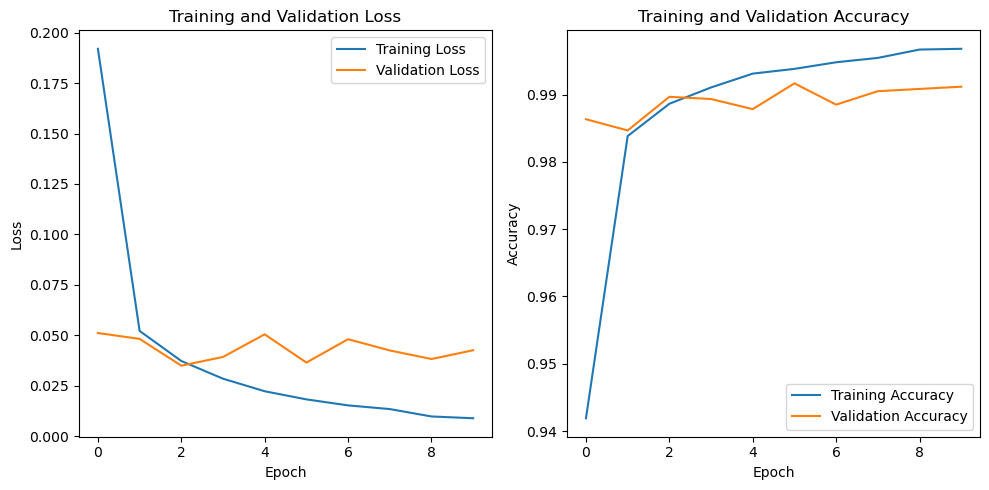

In [6]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(10, 5))
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)


Training and Validation Loss:
The plot  illustrates the training and validation loss of a Convolutional Neural Network (CNN) model over multiple epochs. X-Axis represents the number of training epochs and Y-Axis: Represents the loss value. The training Loss tarts at a high loss value (around 0.2) and rapidly decreases as the model learns from the training data. Indicates that the model is fitting well to the training data. The Validation Loss Also starts at a high loss value but decreases more gradually with some fluctuations.

Training and Validation Accuracy:
The Training and Validation Accuracy, the X-axis represents Training Accuracy and Y-axis for Validation Accuracy. The x-axis represents the number of training epochs (iterations), ranging from 0 to 8.The y-axis represents the accuracy, with values ranging from 0.94 to 0.99.The Training Accuracy Starts at a relatively low value (around 0.94) and rapidly increases during the initial epochs. It reaches near-perfect accuracy (around 0.99) as the model learns from the training data. It Indicates that the model is fitting well to the training data. The Validation Accuracy Also starts at a low value. Increases but plateaus around epoch 2. The Validation accuracy curve might indicating that the model is slightly overfitting.

Thw above code describes the function plot_training_history used to visualize the training history of a machine learning model. It takes history as input, including metrics (loss and accuracy) collected during training and validation. Two subplots are constructed: one to illustrate training and validation losses, and the other to plot training and validation accuracies between epochs. The program then plots the metrics and displays them using Matplotlib. The annotated section suggests using this functionality after training and evaluation of the model to visualize its performance over several epochs.

In [1]:
'''# Evaluate model performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Generate and print confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)'''


'# Evaluate model performance\ntest_loss, test_acc = model.evaluate(x_test, y_test)\nprint("Test Loss:", test_loss)\nprint("Test Accuracy:", test_acc)\n\n# Generate and print confusion matrix\ny_pred = np.argmax(model.predict(x_test), axis=-1)\ny_true = np.argmax(y_test, axis=-1)\ncm = confusion_matrix(y_true, y_pred)\nprint("Confusion Matrix:")\nprint(cm)'

# k-Fold and Confusion Matrix:

In [8]:
# K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True)
fold = 0
for train_index, val_index in kf.split(x_train):
    fold += 1
    print(f"Fold {fold}")
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(x_train_fold, y_train_fold, epochs=5, batch_size=128, validation_data=(x_val_fold, y_val_fold))
    
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print("Test accuracy:", test_acc)

# Confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


Fold 1
Epoch 1/5
375/375 [==============================] - 15s 38ms/step - loss: 0.2768 - accuracy: 0.9212 - val_loss: 0.0945 - val_accuracy: 0.9709
Epoch 2/5
375/375 [==============================] - 14s 36ms/step - loss: 0.0667 - accuracy: 0.9799 - val_loss: 0.0698 - val_accuracy: 0.9778
Epoch 3/5
375/375 [==============================] - 13s 36ms/step - loss: 0.0474 - accuracy: 0.9850 - val_loss: 0.0572 - val_accuracy: 0.9835
Epoch 4/5
375/375 [==============================] - 14s 36ms/step - loss: 0.0367 - accuracy: 0.9881 - val_loss: 0.0461 - val_accuracy: 0.9852
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0344 - accuracy: 0.9892
Test accuracy: 0.9891999959945679
Fold 2
Epoch 1/5
375/375 [==============================] - 15s 38ms/step - loss: 0.2530 - accuracy: 0.9245 - val_loss: 0.0802 - val_accuracy: 0.9758
Epoch 2/5
375/375 [==============================] - 14s 37ms/step - loss: 0.0654 - accuracy: 0.9796 - val_loss: 0.0623 - val_accuracy: 0.

K-Fold:
The code uses K-Fold cross-validation for the Convolutional Neural Network (CNN) model trained on the MNIST dataset. K-Fold cross-validation divides the data set into 5 folds, shuffling the data for randomness. At each iteration, one bunch is determined for validation, and the remaining bunch is used for training. The CNN model architecture consists of convolutional layers for feature extraction and dense layers for segmentation. The model is clustered using the ADAM optimizer, the categorical cross-entropy loss function, and the accuracy metric. Training is performed for 5 periods on the training data of each bunch, including the validation data from the validation bunch. After training, the performance of the model is evaluated on the test set to estimate the test loss and accuracy. Additionally, a confusion matrix is ​​constructed using model predictions and true scores from the test set, providing insights into model performance across classes This approach allows for robust and supportive evaluation of model performance identify potential areas for improvement, ensure model reliability and generalizability.

Confusion Matrix:
The presented confusion matrix summarizes the performance of the classification model trained on the MNIST dataset, which contains signature digit images (scores 0 to 9.) Each row in the image represents an actual digit class, . while each column represents an instance of the predicted class. The numbers in the matrix indicate the counts of instances in which the model's prediction matches the true label for each class. For example, a value at (0, 0) indicates that the model correctly predicted 977 samples for a score of 0. The diagonal elements of the matrix represent correct predictions, while the non-diagonal elements represents a misclassification. For example, the values ​​in (4, 9) indicate that the model incorrectly classified 12 samples of 9 points as scores Overall, it is a valuable tool for assessing the quality of a classification model work well and maintain its accuracy.

